# Mentale Gezondheid

Student names: Justin van Egmond, Noor Verbrugge & Douwe Maljers

Team number: 32

## Beïnvloedende Factoren Op Mentale Gezondheid

Sociale media is niet meer weg te denken uit vrijwel ieders leven, maar dit is met name het geval voor jongeren en studenten. Het is een nieuwe norm geworden, om online actief te zijn en onderdelen je leven online te delen. Voorheen was contact iets, wat louter in de fysieke wereld mogelijk was, maar sociale media heeft op dit gebied een revolutie teweeggebracht die door sommigen als problematisch beschouwd wordt (NOS, 2025). Iedereen is met een druk op de knop bereikbaar. Dit geeft op zijn beurt weer een druk op mensen om ook altijd bereikbaar te zijn, voor iemand die contact wil leggen. Sommigen zijn van mening, dat deze tijdbesteding verloren tijd is, die eigenlijk in andere dingen gestopt zou moeten worden. Naast de andere invulling van tijdsbesteding onder de nieuwere generaties, bestaat de consensus dat sociale media, naast andere factoren van invloed is op iemands mentale gezondheid (Huang, 2017).

De mentale gezondheid van studenten is drastisch verslechterd sinds de coronapandemie. Dit is extra zorgelijk, aangezien de WHO in 2017 studenten al bestempelde als een groep met een hogere prevalentie van verminderde mentale gezondheid dan de rest van de bevolking (Zarowski et al., 2024). Het is van enorm belang voor het slagen van deze generatie in het werkveld, dat mogelijke verklaringen van verminderde mentale gesteldheid in kaart worden gebracht, om de maatschappij in de toekomst op de been te houden en deze beter te kunnen behoeden tegen dergelijke mentale problematiek. In figuur 2 worden, aan de hand van onderzochte data, factoren getoond die op het oog invloed hebben op de depressiescore van studenten.

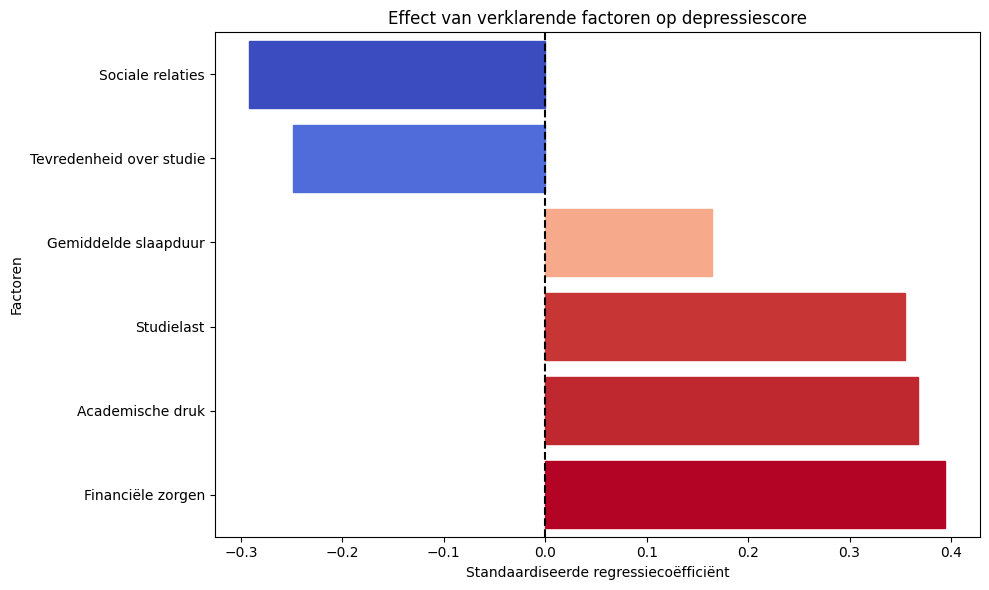

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Dataset inladen
da = pd.read_csv("datasets/MentalHealthSurvey.csv")

# Kolomnamen toevoegen
da.columns = [
    'gender', 'age', 'university', 'degree_level', 'degree_major', 'academic_year',
    'cgpa', 'residential_status', 'campus_discrimination', 'sports_engagement',
    'average_sleep', 'study_satisfaction', 'academic_workload', 'academic_pressure',
    'financial_concerns', 'social_relationships', 'depression', 'anxiety',
    'isolation', 'future_insecurity', 'stress_relief_activities'
]

# CGPA converteren
def convert_cgpa(value):
    if isinstance(value, str) and "-" in value:
        try:
            low, high = value.split("-")
            return (float(low) + float(high)) / 2
        except:
            return None
    try:
        return float(value)
    except:
        return None

da['cgpa'] = da['cgpa'].apply(convert_cgpa)

# Slaapduur converteren
def convert_sleep(value):
    if isinstance(value, str) and "-" in value:
        try:
            nums = [int(s.replace("hrs", "").strip()) for s in value.split("-")]
            return sum(nums) / len(nums)
        except:
            return None
    try:
        return float(value)
    except:
        return None

da['average_sleep'] = da['average_sleep'].apply(convert_sleep)

# Variabelen en doelvariabele
features = [
    'academic_workload',
    'academic_pressure',
    'financial_concerns',
    'study_satisfaction',
    'social_relationships',
    'average_sleep'
]
target = 'depression'

# Data voorbereiden
reg_df = da[features + [target]].dropna().astype(float)
X = reg_df[features].values
y = reg_df[target].values

# Zelf standaardiseren
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_scaled = (X - X_mean) / X_std

# Standaardiseren van y is niet nodig bij regressiecoëfficiënten

# Lineaire regressie via least squares (zonder sklearn)
X_design = np.column_stack([np.ones(X_scaled.shape[0]), X_scaled])  # intercept + features
beta = np.linalg.lstsq(X_design, y, rcond=None)[0]  # [intercept, coef1, ..., coef6]
coefs = pd.Series(beta[1:], index=features).sort_values()

# Labels leesbaar maken
rename_map = {
    'academic_workload': 'Studielast',
    'academic_pressure': 'Academische druk',
    'financial_concerns': 'Financiële zorgen',
    'study_satisfaction': 'Tevredenheid over studie',
    'social_relationships': 'Sociale relaties',
    'average_sleep': 'Gemiddelde slaapduur'
}
coefs.index = coefs.index.map(rename_map)

# DataFrame voor plot
bar_df = pd.DataFrame({
    "Variabele": coefs.index,
    "Waarde": coefs.values
})

# Kleurgradient berekenen (coolwarm met wit rond 0)
norm = mcolors.TwoSlopeNorm(
    vmin=bar_df["Waarde"].min(),
    vcenter=0,
    vmax=bar_df["Waarde"].max()
)
cmap = plt.colormaps['coolwarm']
kleuren = [mcolors.to_hex(cmap(norm(w))) for w in bar_df["Waarde"]]

# Plotten
fig, ax = plt.subplots(figsize=(10, 6))
bars = sns.barplot(
    data=bar_df,
    x="Waarde",
    y="Variabele",
    orient="h",
    ax=ax
)
for bar, kleur in zip(bars.patches, kleuren):
    bar.set_color(kleur)

ax.axvline(0, color='black', linestyle='--')
ax.set_title("Effect van verklarende factoren op depressiescore")
ax.set_xlabel("Standaardiseerde regressiecoëfficiënt")
ax.set_ylabel("Factoren")
fig.tight_layout()
plt.show()


> *Figuur 2: De correlatie tussen verschillende factoren op de mentale gezondheid van studenten.*

Figuur 2 toont het een staafdiagram met de gestandaardiseerde regressiecoëfficiënten van zes factoren die mogelijk verband houden met de depressiescore van studenten. De x-as geeft de sterkte en richting van het effect weer, negatieve waarden hebben een negatieve relatie met de depressiescore, wat betekent dat een toename van deze variabele lijdt tot een afname van de depressiescore. Anderzijds beïnvloeden positieve waarden deze score positief, wat duidt op een toename van de depressiescore, naarmate de variabele toene. De y-as zet de onderzochte factoren uiteen. Sociale relaties lijken het sterkst samen te hangen met een lage depressiescore, deze variabele omschrijft de mate waarin studenten sociale verbinding vinden aan de universiteit en zich gezien en gehoord voelen. Daarnaast is er ook een sterk verband tussen de tevredenheid over studie en een verminderde depressiescore. Waardering van studie lijkt dus samen te hangen met een lagere depressiescore. Aan de andere kant hebben een hoge studielast, het ondervinden van academische druk, en met name financiële zorgen een positieve relatie met de depressiescore. Naarmate men meer studielast en academische druk ervaart, variabelen die hoge onderlinge correlatie hebben, neemt de depressiescore toe. Een langere gemiddelde slaapduur lijkt hier ook samen te hangen met een kleine toename van de depressiescore, iets wat tegenintuïtief lijkt en ook de literatuur tegenspreekt. Een gezond slaappatroon wordt vaak geassocieerd met verbetering van mentale gezondheid. Echter, is er bij teveel slaap geen sprake van een gezond slaappatroon, wat een mogelijke verklaring kan zijn voor dit gevonden verband (Lee et al., 2024).

## Slaapgedrag

Hoewel in Figuur 2 een langere gemiddelde slaapduur samenhangt met een lichte toename van de depressiescore, is het belangrijk om dit resultaat in perspectief te plaatsen. In Figuur 3 wordt, op basis van een andere dataset, een duidelijk positief verband aangetoond tussen het aantal uren slaap en mentale gezondheid: naarmate studenten meer slapen , neemt hun mentale welzijn toe. Dit bevestigt bevindingen uit bestaande literatuur waarin voldoende slaap consequent wordt gekoppeld aan betere mentale gezondheid (Lee et al., 2024). De schijnbare tegenstelling met Figuur 2 kan mogelijk worden verklaard door het verschil tussen gezond veel slapen en overmatig slapen, waarbij het laatste vaak een symptoom is van onderliggende psychische (Dauvilliers et al., 2013).

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import os
import kagglehub
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Dataset ophalen
path = kagglehub.dataset_download("adilshamim8/social-media-addiction-vs-relationships")
csv_path = os.path.join(path, "Students Social Media Addiction.csv")
df = pd.read_csv(csv_path)

# Filter op leeftijd en geldige waarden
df_filtered = df[(df['Age'] >= 18) & (df['Age'] <= 25)]
df_filtered = df_filtered.dropna(subset=["Mental_Health_Score", "Sleep_Hours_Per_Night", "Gender"])

# Kleuren
colors = {"Male": "blue", "Female": "deeppink", "All": "green"}

# Functie om groepsgemiddelde lijntrace te maken
def get_line_trace(gender=None):
    if gender:
        d = df_filtered[df_filtered["Gender"] == gender]
        label = gender
    else:
        d = df_filtered
        label = "All"

    df_avg = d.groupby("Sleep_Hours_Per_Night")["Mental_Health_Score"].mean().reset_index()

    return go.Scatter(
        x=df_avg["Sleep_Hours_Per_Night"],
        y=df_avg["Mental_Health_Score"],
        mode='lines+markers',
        name=label,
        line=dict(color=colors[label], width=3),
        visible=True if label == "Male" else False
    )

# Genereer traces
male_line = get_line_trace("Male")
female_line = get_line_trace("Female")
all_line = get_line_trace(None)

# Dropdown-menu (met correcte title.text)
buttons = [
    dict(label="Man",
         method="update",
         args=[{"visible": [True, False, False]},
               {"title": {"text": "Gemiddelde mentale gezondheid per slaapduur (mannen)"}}]),
    dict(label="Vrouw",
         method="update",
         args=[{"visible": [False, True, False]},
               {"title": {"text": "Gemiddelde mentale gezondheid per slaapduur (vrouwen)"}}]),
    dict(label="Iedereen",
         method="update",
         args=[{"visible": [False, False, True]},
               {"title": {"text": "Gemiddelde mentale gezondheid per slaapduur (alle studenten)"}}]),
    dict(label="Allemaal",
         method="update",
         args=[{"visible": [True, True, True]},
               {"title": {"text": "Gemiddelde mentale gezondheid per slaapduur (alle groepen)"}}])
]

# Plot figuur
fig = go.Figure(data=[male_line, female_line, all_line])

fig.update_layout(
    title={"text": "Gemiddelde mentale gezondheid per slaapduur (mannen)"},
    xaxis=dict(
        title="Aantal uren slaap per nacht",
        range=[3, 10], 
        dtick=1,
        fixedrange=True
    ),
    yaxis=dict(
        title="Gemiddelde mentale gezondheidsscore",
        range=[3, 10],      
        dtick=1,
        fixedrange=True
    ),
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        direction="down",
        showactive=True,
        x=0.01,             
        xanchor="left",
        y=1.15,             
        yanchor="top"
    )]
)

fig.show()

> *Figuur 3: De correlatie tussen de hoeveelheid slaap uren per nacht en de mentale gezondheid van mannen en vrouwen.*

Figuur 3 toont het verband tussen het aantal uren slaap per nacht (x-as) en de mentale gezondheidsscore van studenten (y-as). Voor zowel mannelijke als vrouwelijke studenten is een duidelijke positieve trend zichtbaar in de regressielijn: de mentale gezondheidsscore neemt toe naarmate studenten meer slapen. Dit wijst erop dat voldoende slaap een beschermende factor vormt voor het mentale welzijn van studenten. Het patroon ondersteunt het idee dat slaaptekort nadelige effecten heeft op de geestelijke gezondheid, terwijl een gezond slaappatroon juist bijdraagt aan psychisch herstel en emotioneel evenwicht (Lee et al., 2024).

## Sociale Media

Studenten zijn al langer bekend om gevoelig te zijn voor mentale stoornissen. Door hoge studielast, sociale druk en financiële moeilijkheden staan zijn erg onder druk. Ook zijn jongeren meer actief op sociale media en worden daardoor ook beïnvloed. Veel studenten geven aan dat hun studieprestaties negatief worden beïnvloed door sociale media. Studenten die aangeven academisch beïnvloed te worden, gebruiken sociale media vaker. 

In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import os
import kagglehub
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

path = kagglehub.dataset_download("adilshamim8/social-media-addiction-vs-relationships")
csv_path = os.path.join(path, "Students Social Media Addiction.csv")
df = pd.read_csv(csv_path)
df = df.dropna(subset=["Avg_Daily_Usage_Hours", "Mental_Health_Score", "Gender"])

genders = ["Male", "Female"]
colors = {"Male": "blue", "Female": "deeppink", "All": "green"}

# Functie om scatter + regressielijn trace te maken
def get_traces(gender=None):
    if gender:
        d = df[df["Gender"] == gender]
        label = gender
    else:
        d = df
        label = "All"

    # Regressielijn berekenen
    x = d["Avg_Daily_Usage_Hours"]
    y = d["Mental_Health_Score"]
    slope, intercept = np.polyfit(x, y, 1)
    x_vals = np.linspace(x.min(), x.max(), 100)
    y_vals = slope * x_vals + intercept

    # Scatter trace
    scatter = go.Scatter(
        x=x, y=y,
        mode='markers',
        name=f"{label} - data",
        marker=dict(color=colors[label], opacity=0.6),
        showlegend=True
    )

    # Lijn trace
    line = go.Scatter(
        x=x_vals, y=y_vals,
        mode='lines',
        name=f"{label} - trend",
        line=dict(color=colors[label], width=2),
        showlegend=True
    )

    return scatter, line

# Maak alle traces aan (elk 2: scatter + line)
male_traces = get_traces("Male")
female_traces = get_traces("Female")
all_traces = get_traces(None)
all_plot_traces = [*male_traces, *female_traces, *all_traces]

# Vaste assen bepalen op basis van hele dataset
x_min = df["Avg_Daily_Usage_Hours"].min()
x_max = df["Avg_Daily_Usage_Hours"].max()
y_min = df["Mental_Health_Score"].min()
y_max = df["Mental_Health_Score"].max()

# Dropdown menu zonder title updates
buttons = [
    dict(label="Man",
         method="update",
         args=[{"visible": [True, True, False, False, False, False]}]),
    dict(label="Vrouw",
         method="update",
         args=[{"visible": [False, False, True, True, False, False]}]),
    dict(label="Iedereen",
         method="update",
         args=[{"visible": [False, False, False, False, True, True]}])
]

# Plot figuur
fig = go.Figure(data=all_plot_traces)

fig.update_layout(
    title={"text": "Social media gebruik vs. mentale gezondheid"},
    xaxis=dict(
        title="Gemiddeld aantal gebruiksuren van social media per dag",
        range=[x_min - 1, x_max + 1],  # iets marge
        dtick=1,
        fixedrange=True
    ),
    yaxis=dict(
        title="Mentale gezondheidsscore",
        range=[y_min - 1, y_max + 1],
        dtick=1,
        fixedrange=True
    ),
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        direction="down",
        showactive=True,
        x=0.01,              
        xanchor="left",
        y=1.15,             
        yanchor="top"
    )]
)

fig.show()


> *Figuur 4: Gebruik van sociale media en de mentale gezondheid van mannen en vrouwen.*

De bovenstaande interactieve grafiek laat het verband zien tussen het gemiddelde aantal uren dat studenten per dag op social media doorbrengen (x-as) en hun mentale gezondheidsscore (y-as). Deze score laat zien hoe goed of slecht studenten zich mentaal voelen, hoe hoger de score, hoe beter ze zich voelen.

Voor elke groep is zowel de ruwe data (in de vorm van een scatterplot) als een trendlijn (lineaire regressie) weergegeven. Deze trendlijn geeft het algemene patroon aan in de relatie tussen socialmediagebruik en mentale gezondheid. Wat opvalt, is dat de regressielijnen voor alle drie de groepen een negatieve helling hebben. Dit betekent dat naarmate studenten meer tijd besteden aan social media, hun mentale gezondheidsscore gemiddeld genomen daalt. Dus, meer gebruik van social media lijkt samen te hangen met een verslechtering van de mentale gezondheid.

In de visualisatie worden de gegevens opgedeeld in drie groepen: mannen, vrouwen en een gecombineerde groep van alle respondenten. De dropdownfunctie boven de grafiek maakt het mogelijk om de gegevens afzonderlijk per gender of voor alle respontenten te bekijken. Dit biedt de mogelijkheid om verschillen tussen mannen en vrouwen te analyseren. Hoewel de algemene trend (negatief verband) bij beide geslachten aanwezig is, kunnen er subtiele verschillen zijn in de mate van de daling of spreiding van de data.

Deze visualisatie benadrukt een zorgwekkend patroon, studenten die veel tijd op social media doorbrengen, ervaren gemiddeld een lagere mentale gezondheid. Hoewel dit geen oorzakelijk verband aantoont, is er wel een duidelijke correlatie aanwezig tussen sociale media en de mentale gezondheid.

## Sport Gewoontes

Meer bewegen wordt in de wetenschappelijke literatuur gezien, als één van de eenvoudigste manieren om iemands mentale gezondheid te verbeteren (Mahindru et al., 2023). Dit idee wordt bevestigd door de data uit de gevonden datasets. Daarnaast heeft meer fysieke activiteit een positieve invloed op het slaappatroon (Mahindru et al., 2023), wat tot een extra versterkt effect ter verbetering van de mentale gezondheid onder studenten zou kunnen leiden.

In [1]:
import kagglehub
import pandas as pd
import os
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
# Download latest version
path = kagglehub.dataset_download("abdullahashfaqvirk/student-mental-health-survey")

# print("Path to dataset files:", path)

csv_path = os.path.join(path, "MentalHealthSurvey.csv") 
df = pd.read_csv(csv_path)
# print(df.head(n=5))

df['sports_engagement'] = pd.Categorical(
    df['sports_engagement'],
    categories=['No Sports','1-3 times', '4-6 times', '7+ times'],
    ordered=True
)
depressie_level = df['depression']
stress_level = df['anxiety']
slaap_level = df['average_sleep']
isolatie = df['isolation']

fig = go.Figure()

fig.add_trace(go.Box(
    x=df['sports_engagement'],
    y=stress_level
))
fig.update_layout(
    title = 'Stress en Sportgewoontes',
    xaxis_title = 'Wekelijkse sportfrequentie',
    yaxis_title = 'Stress score',
    xaxis=dict(
        categoryorder='array',
        categoryarray=['No Sports', '1-3 times', '4-6 times', '7+ times']
    )
)

fig.show()



> *Figuur 5: Boxplot van stressniveau en wekelijkse sportfrequentie .*

De bovenstaande boxplot laat zien hoe het stressniveau van studenten samenhangt met hun sportgewoontes. Op de horizontale as (x-as) staan vier categorieën die aangeven hoe vaak studenten per week sporten: No Sports, 1–3 times, 4–6 times en 7+ times. Op de verticale as (y-as) staat het gerapporteerde stressniveau, gemeten op een schaal van 1 (laag) tot 5 (hoog), afkomstig uit de dataset van een studentenonderzoek naar mentale gezondheid.

Elke box geeft de spreiding van stressniveaus binnen een sportcategorie weer. De dikke lijn in het midden van de box toont de mediaan (het midden van de dataset), terwijl de boven- en onderrand van de box het interkwartielbereik aangeven (de middelste 50% van de waarden). De lijnen (whiskers) tonen de volledige spreiding, en eventuele punten buiten dit bereik zijn uitschieters, zoals te zien is bij 7+ times, waar één student een extreem laag stressniveau van 1 heeft.

Wat opvalt in de visualisatie is dat studenten die niet sporten gemiddeld het hoogste stressniveau ervaren. Hun mediaan ligt op niveau 4, met een vrij brede spreiding. Naarmate de frequentie van sportdeelname toeneemt, daalt het gemiddelde stressniveau. Een overmatige hoeveelheid stress is een indicator van verminderde mentale gezondheid (Fruehwirth et al., 2023). De groep die 4–6 keer per week sport laat zelfs de laagste mediaan zien (niveau 2), met een relatief compacte spreiding. Het stressniveau bij studenten die meer dan 7 keer per week sporten ligt weer iets hoger, dit zou kunnen komen doordat die studenten zo hard en waarschijnlijk ook op redelijk hoog niveau sporten, waardoor het weer stress oplevert door bijvoorbeeld prestatiedruk of tijdsgebrek. Een gebrek aan tijd voor dingen die belangrijk geacht worden is een veel onderzochte reden voor stress (Maule & Hockey, 1998).
 Deze resultaten suggereren dat regelmatige fysieke activiteit, samenhangt met lagere stressniveaus onder studenten. Hoewel deze data geen causaal verband bewijst, biedt het wel aanleiding om sport te beschouwen als een mogelijke beschermende factor voor mentale gezondheid. Kortom, deze grafiek onderstreept het belang van een gebalanceerd sportpatroon als potentiële bijdrage aan stressvermindering bij studenten.

### Academische druk

Academische druk wordt steeds vaker genoemd als een bepalende factor voor de mentale gezondheid van studenten (Beiter et al., 2014). Tegelijkertijd ondervinden, met name hoog opgeleide en vrouwlijke studenten steeds academische druk, maar deze trend is over de gehele studentenpopulatie zichtbaar (Cosma et al., 2021).

In [3]:
import pandas as pd
import plotly.express as px
import os
import kagglehub

# Dataset ophalen
path = kagglehub.dataset_download("abdullahashfaqvirk/student-mental-health-survey")
csv_path = os.path.join(path, "MentalHealthSurvey.csv")
df = pd.read_csv(csv_path)

# Kolommen numeriek maken
df["depression"] = pd.to_numeric(df["depression"], errors="coerce")
df["academic_pressure"] = pd.to_numeric(df["academic_pressure"], errors="coerce")

# Verwijder missende data
df = df.dropna(subset=["depression", "academic_pressure"])

# Rond academische druk af naar hele getallen
df["academic_pressure_rounded"] = df["academic_pressure"].round(0).astype(int)

# Groepeer en bereken gemiddelde depressiescore per afgerond drukniveau
mean_df = df.groupby("academic_pressure_rounded", as_index=False)["depression"].mean()

# Staafdiagram maken met rood kleurverloop
fig = px.bar(
    mean_df,
    x="academic_pressure_rounded",
    y="depression",
    title="Gemiddelde depressiescore per niveau van academische druk",
    labels={
        "academic_pressure_rounded": "Academische druk",
        "depression": "Gemiddelde depressiescore"
    },
    template="plotly_white",
    color="depression",
    color_continuous_scale=["#ffcccc", "#ff6666", "#cc0000", "#660000"]
)

# Stijl: geen ruimte tussen de balken, kleinere breedte
fig.update_layout(
    bargap=0,
    xaxis=dict(dtick=1),
    width=1200,
    height=400
)

fig.show()

> *Figuur 6: Staafdiagram van depressiesscore afgezet tegen ervaren academische druk.*

De staafdiagram in Figuur 6 toont de gemiddelde depressiescore van studenten, uitgesplitst naar hun zelf gerapporteerde niveau van academische druk, gemeten op een schaal van 1 (laag) tot 5 (hoog). Er is een duidelijke trend zichtbaar, naarmate de academische druk stijgt, stijgt ook de depressiescore. Studenten die hun druk als ‘5’ beoordelen, rapporteren gemiddeld bijna een vol punt hoger dan studenten met een drukscore van ‘1’. Dit wijst op een duidelijke positieve samenhang tussen ervaren druk en depressieve symptomen.
Enkel de stap tussen de niveaus 1 en 2 van academische druk vertoning een uitzondering op dit patroon. Dit zou verklaard kunnen worden, doordat studenten die last hebben van ernstige mentale problematiek, academische druk niet als grootste stressor ervaren, omdat zij meer worstelen met interne emotionele en psychologische barrières (Duraku et al., 2024). De gevonden data sluit aan op wetenschappelijke literatuur, waarin met regelmaat gestelt wordt dat hoge academische verwachtingen en druk verbandt houdt met het ervaren van depressieve klachten (Beiter et al., 2014; Eisenberg et al., 2007). Daarnaast suggereert Figuur 6, dat dit effect niet pas bij hoge ervaren druk zichtbaar is, maar geleidelijk oploopt.



## Financiële zorgen

In [ ]:
import pandas as pd
import plotly.express as px
import os
import kagglehub

# Dataset ophalen
path = kagglehub.dataset_download("abdullahashfaqvirk/student-mental-health-survey")
csv_path = os.path.join(path, "MentalHealthSurvey.csv")
df = pd.read_csv(csv_path)

# Kolommen numeriek maken
df["financial_concerns"] = pd.to_numeric(df["financial_concerns"], errors="coerce")
df["depression"] = pd.to_numeric(df["depression"], errors="coerce")

# Verwijder missende data
df = df.dropna(subset=["financial_concerns", "depression"])

# Rond waardes af naar hele getallen
df["financial_rounded"] = df["financial_concerns"].round(0).astype(int)
df["depression_rounded"] = df["depression"].round(0).astype(int)

# Maak heatmap
fig = px.density_heatmap(
    df,
    x="financial_rounded",
    y="depression_rounded",
    title="Dichtheidskaart: Financiële Zorgen vs. Depressie",
    labels={
        "financial_rounded": "Financiële zorgen (afgerond)",
        "depression_rounded": "Depressieniveau (afgerond)"
    },
    template="plotly_white",
    color_continuous_scale="tealrose"
)

# Hele getallen op assen, zonder tussenruimte
fig.update_xaxes(
    tickmode="linear",
    dtick=1
)
fig.update_yaxes(
    tickmode="linear",
    dtick=1
)
fig.update_traces(xgap=0, ygap=0)  

fig.show()


> *Figuur 7: Heatmap van depressie ten opzichte van financiële zorgen .*

De bovenstaande dichtheidskaart (heatmap) toont het verband tussen financiële zorgen en het depressieniveau onder studenten. Op de x-as staan de mate van ervaren financiële zorgen, en op de y-as het gerapporteerde niveau van depressie. Beide schalen lopen van 1 (laag) tot 5 (hoog) en zijn afgerond naar gehele getallen om een overzichtelijke rasterweergave mogelijk te maken. Elke cel in de heatmap vertegenwoordigt het aantal studenten dat een bepaalde combinatie van financiële zorgen en depressie heeft gerapporteerd. Hoe donkerder of roder de cel, hoe groter het aantal studenten in die combinatie. De kleurenschaal rechts geeft aan hoeveel studenten (count) in elke cel vallen.

De donkerrode zone rechtsboven (financiële zorgen = 5 en depressieniveau = 5) wijst op een concentratie van studenten die zowel hoge financiële zorgen als hoge depressieniveaus ervaren In tegenstelling hiermee zijn lichtere gebieden zichtbaar in de linksonder (lage financiële zorgen en lage depressie), wat betekent dat er relatief minder studenten zijn met lage scores op beide vlakken. De algemene diagonale opbouw van linksonder naar rechtsboven suggereert een positieve samenhang: naarmate de financiële zorgen toenemen, neemt ook het risico op depressieve klachten toe.

Deze visualisatie laat duidelijk zien dat er een verband bestaat tussen economische stress en mentale gezondheid. Studenten die hoge financiële zorgen rapporteren, hebben vaker ook een hoger depressieniveau. Hoewel de grafiek geen oorzaak-gevolgrelatie bevestigt, versterkt dit patroon wel bestaande inzichten uit de literatuur: geldproblemen kunnen een grote bron van psychische belasting zijn.
